# Introduction to Seaborn

In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline 
# đảm bảo các figure nằm trong jupyter notebook để ảnh không mở ở trang khác

In [3]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


## Styling

In [4]:
sns.set_theme() #apply default

## Numerical Plots: Vẽ đồ thị dựa trên số liệu
* **Distribution**: Histogram, KDE(Kernel Density Estimate)
- **Bar plot**
- **Count plot**
- **Facet plot**: Tạo ra một lưới 2D gồm các bảng được xác định bởi các biến tạo các hàng và cột.
- **Box plot**: Phương pháp để mô tả bằng đồ thị các nhóm dữ liệu số thông qua các phần tử của chúng
- **Join plot**
- **Pair plot**
- **Heat Map**: một kỹ thuật trực quan hóa dữ liệu cho thấy cường độ hiện tượng là màu sắc ở hai chiều

## Distribution plot
* univariate distribution of observation: vẽ phân phối các quan sát trong 1 biến duy nhất

In [5]:
tips_df = sns.load_dataset("tips")

In [6]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


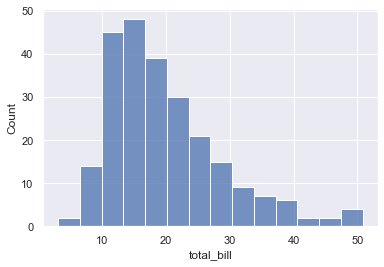

In [7]:
sns.histplot(data = tips_df["total_bill"]);

In [8]:
tips_df["total_bill"].value_counts().sort_values(ascending = False)

13.42    3
7.25     2
21.01    2
20.69    2
10.34    2
        ..
29.03    1
27.18    1
22.67    1
17.82    1
18.78    1
Name: total_bill, Length: 229, dtype: int64

## KDE Plot
* A kernel density estimate(KDE) plot is a method for visualizing the distribution in a dataset, aanalagous to a histogram.k
* KDE represents the data using a continous probability density curve in one or more demensions


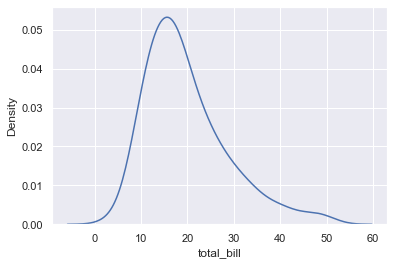

In [9]:
sns.kdeplot(data = tips_df["total_bill"]);

### Displot
* Imformative distributiuonal sumaries
Statistical analyses require knowledge about the distribution of variables in your dataset. The seaborn function `displot()` supports several approaches to visualizing distributions. These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation.

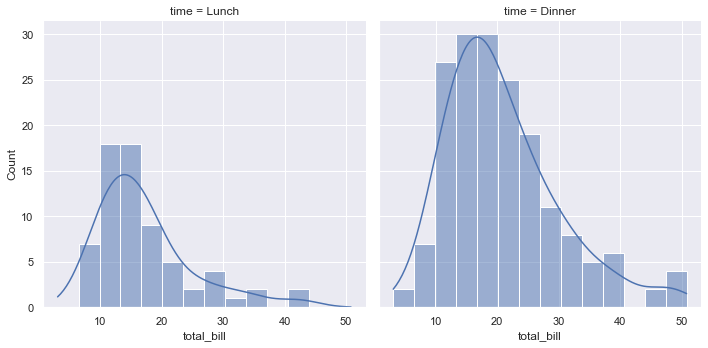

In [10]:
sns.displot(data = tips_df, x = "total_bill",col = "time", kde = True); #col để phân bổ

In [11]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


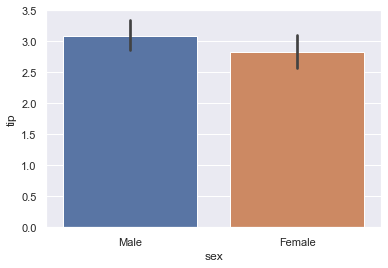

In [13]:
sns.barplot(data = tips_df, x = "sex", y = "tip", estimator = np.mean);

## Count plot

In [14]:
tips_df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

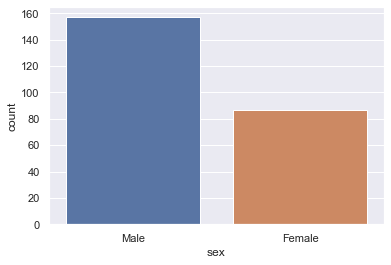

In [15]:
sns.countplot(data = tips_df, x = "sex");

## Box plot
Box Plot is a good indication of how the values in the data are spread out("minimum", first quartitle(Q1), median, third quartitle(Q3), and maximum)
* Indentity outliers
* Check if data is symmetrical
* Determine how tightly data is grouped
Resource: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

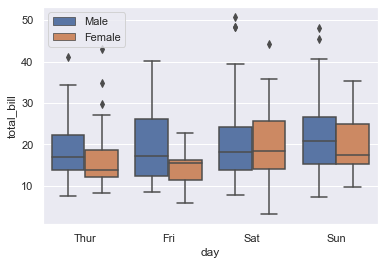

In [18]:
sns.boxplot(data = tips_df, x = "day", y = "total_bill", hue = "sex"); 
# xem dữ liệu ngoại lai, đơn hàng cao nhất, thấp nhât, nam hay nữ trả cao hơn  
plt.legend(loc = 0) # remove chữ sex đi

## Facet Gid
* FacetGird can be drawn with up to three dimensions: row, col, and hue.
* The main approach for visualizing data on this grid is with the FaucetGrid map( method.)

In [19]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


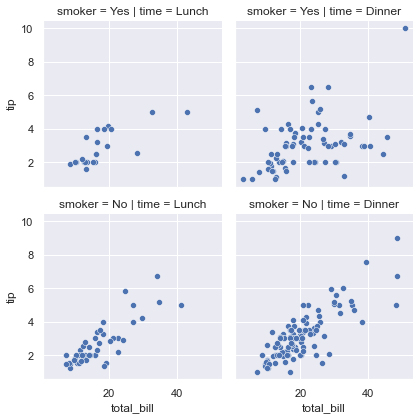

In [21]:
# tìm sự tương quan giữa thời gian với tiền tip và người hút thuốc
tip_fg = sns.FacetGrid(data = tips_df, row="smoker", col = "time") # Creat a class instanceof Facet Grid class
tip_fg.map(sns.scatterplot, "total_bill", "tip");

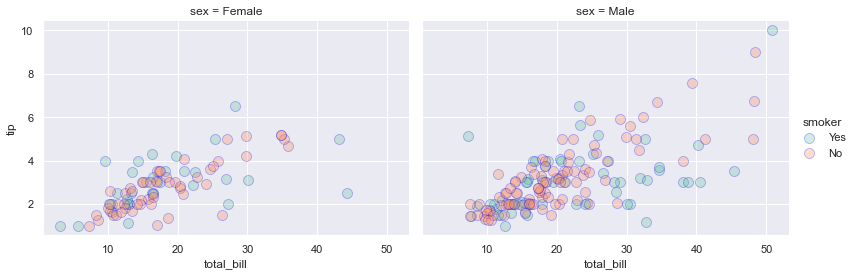

In [38]:
kws = dict(s = 100, edgecolor = "blue", alpha = 0.3) # chỉnh màu, kích cỡ cho các chấm
new_fg = sns.FacetGrid(data = tips_df, col = "sex", 
                       hue = "smoker", # hue để tách ra ai là smoker ai ko là smoker
                       col_order = ["Female", "Male"], #col_oder để biến nào trước, biến nào sau
                       palette="Set2",
                       height = 4, aspect=1.4) # chỉnh chiều dài, chiều rộng 
new_fg.map(sns.scatterplot, "total_bill", "tip",**kws );
new_fg.add_legend();

 ## Joint plot
 * `joint` distributin between two variables along each variable's meginal distribution

In [39]:
penguins_df = sns.load_dataset('penguins')

In [40]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


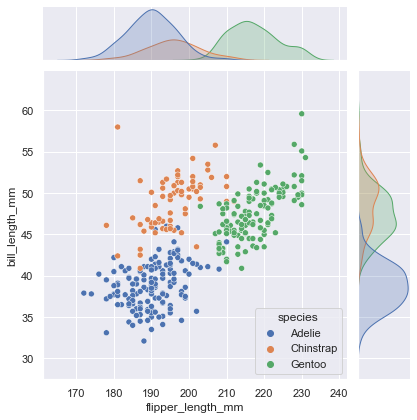

In [47]:
# vex độ tương quan giữa cãi mỏ với cái cánh con chim
sns.jointplot(data = penguins_df, x = "flipper_length_mm", y = "bill_length_mm",
              hue = "species");

## Pair plot

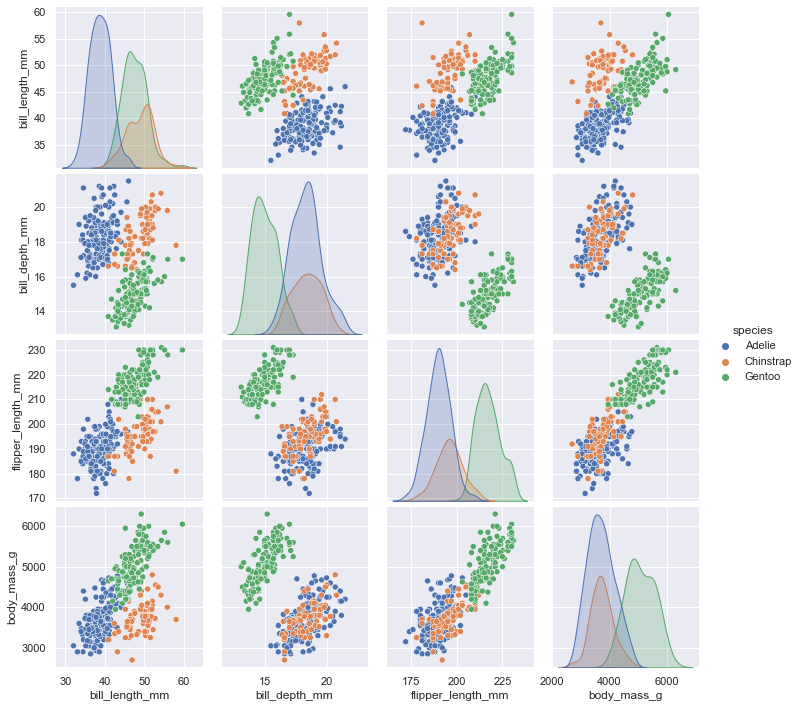

In [48]:
# biểu đồ tương quan của từng biến với nhau
sns.pairplot(data = penguins_df, hue = "species");

## Heatmaps
Describing density or intensity of variables, visualize patterns, and even anomalies.
* Mô tả cường độ và mức độ khác nhau giữa các biến, tương quan, bất thường trong dữ liệu

In [49]:
flight_df = sns.load_dataset("flights")
flight_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [50]:
flights = pd.pivot_table(flight_df, index="month", columns="year", values = "passengers")

In [51]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


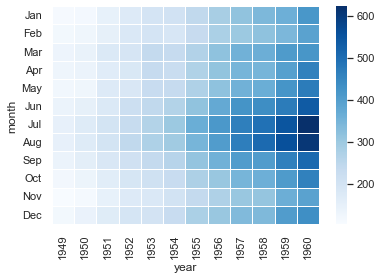

In [61]:
sns.heatmap(data = flights, cmap ="Blues", linecolor= "white", linewidths= 1);

 ## Project: Nutrition Data Visualization on 80 cereal products
 Link:kaggle

In [62]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
#load dataset
cereal_df = pd.read_csv("C:/Users/PC/CODE/PYTHON/Analytic Practice/Seaborn/cereal.csv")

In [78]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [71]:
cereal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [73]:
cereal_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [80]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [81]:
#irrelevant fields: Bỏ các cột không liên quan đến chất dinh dưỡng
fields = ["shelf", "weight", "cups", "rating"]
ceral_df_new = cereal_df.drop(fields, axis = 1)
ceral_df_new.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25


In [83]:
# corr(): Nhân các ma trận với nhau
cereal_corr = ceral_df_new.corr() #Get correlation data
cereal_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000


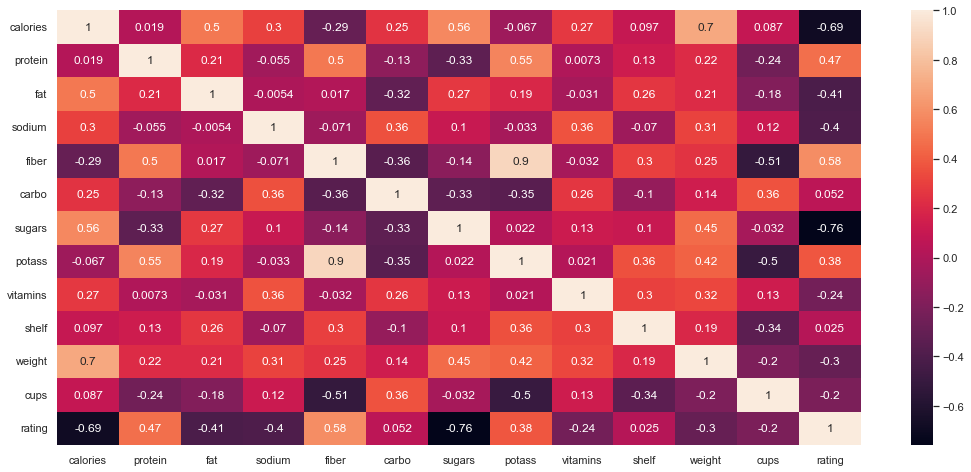

In [94]:
plt.figure(figsize= (18,8))
sns.heatmap(cereal_df.corr(), annot = True);

In [89]:
# ones_like can build a matrix of booleans (True, False) with the same shape as our data
ones_corr = np.ones_like(cereal_corr, dtype = bool)
ones_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [90]:
ones_corr.shape, cereal_corr.shape

((9, 9), (9, 9))

In [91]:
#np's triu: return upper  triangle of matrix
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

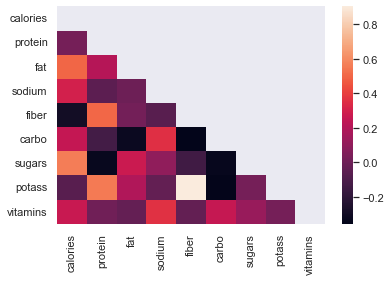

In [92]:
sns.heatmap(data = cereal_corr, mask=mask);

In [93]:
# when removing the upper triangle, here are still two empty cells in our matrix (calories and vitamin)
adjusted_mask = mask[1:, :-1]
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False]])

In [95]:
adjusted_cereal_corr = cereal_corr.iloc[1:, :-1]

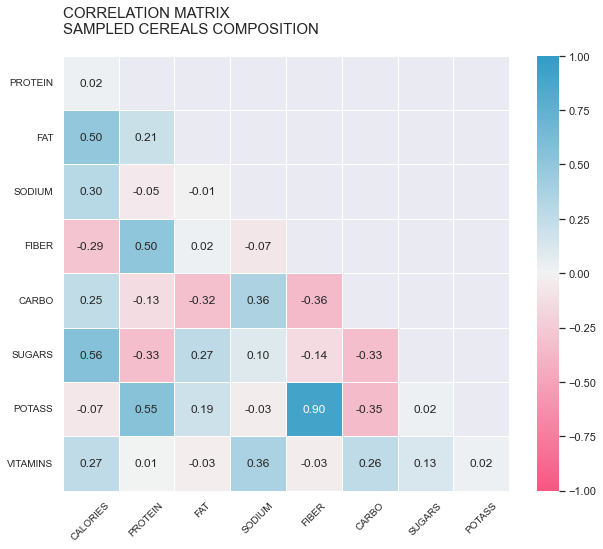

In [132]:
fig, ax = plt.subplots(figsize = (10,8))

#That method uses HUSL colors, so you need hue, saturationm, and lightness.
#I used hsluv.org to select the colors of this chart
# Tạo bảng màu mình thích
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data = adjusted_cereal_corr, mask = adjusted_mask, 
            #cmap = "Blues", # chỉnh màu
            cmap = cmap,
            fmt = ".2f", # 2 chữ số thập phân
            annot = True, # gắn giá trị vô map
            annot_kws= {"fontsize": 12}, # chỉnh kích cỡ các số liệu trong biểu đồ
            vmin = -1, vmax = 1, # chỉnh thanh colorbar từ -1 đến 1
            linecolor="white", linewidths= "0.5" # chỉnh khoảng cách giữa các ô
           );

yticks = [i.upper() for i in adjusted_cereal_corr.index]
xticks = [i.upper() for i in adjusted_cereal_corr.columns]

ax.set_xticklabels(xticks, rotation = 45, fontsize = 10); #rotaion là goc nghiêng của chữ
ax.set_yticklabels(yticks, rotation = 0, fontsize = 10);
title = ("CORRELATION MATRIX\nSAMPLED CEREALS COMPOSITION\n")
ax.set_title(title, loc = "left", fontsize = 15); #loc: vị trí, fontsize: cỡ chữ